<a href="https://colab.research.google.com/github/leobioinf0/visualitzacio_exploratoria/blob/main/S04_T01_Visualitzacio_grafica_dun_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from datetime import datetime
from IPython.display import HTML
from matplotlib import animation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import os
#sns.set_context("paper")
sns.set_context("talk")
sns.set(rc={'figure.figsize':(20,10)})
warnings.filterwarnings('ignore')

# Nivell 1

## Exercici 1
Resumeix gràficament el data set [DelayedFlights.csv](https://www.kaggle.com/giovamata/airlinedelaycauses)

Crea almenys una visualització per:

* Una variable categòrica (UniqueCarrier)
* Una variable numèrica (ArrDelay)
* Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
* Dues variables numèriques (ArrDelay i DepDelay)
* Tres variables (ArrDelay, DepDelay i UniqueCarrier)
* Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [ ]:
os.chdir("/content/drive/MyDrive/Data_Science_amb_Python/Sprint04-Visualitzacio_de_les_dades/S04-T01-Visualitzacio_grafica_dun_dataset/visualitzacio_exploratoria/") 

In [ ]:
!pwd

/content/drive/My Drive/Data_Science_amb_Python/Sprint04-Visualitzacio_de_les_dades/S04-T01-Visualitzacio_grafica_dun_dataset/visualitzacio_exploratoria


In [ ]:
!ls

DelayedFlights.csv
dynamic_images.mp4
S04-T01-Visualitzacio_grafica_dun_dataset_.ipynb
S04-T01-Visualitzacio_grafica_dun_dataset.ipynb
Untitled0.ipynb


In [ ]:
df = pd.read_csv("./DelayedFlights.csv", index_col=0)
df.dropna(inplace=True)
df.head()

Year  Month  DayofMonth  ...  NASDelay  SecurityDelay  LateAircraftDelay
4   2008      1           3  ...       0.0            0.0               32.0
6   2008      1           3  ...       0.0            0.0               47.0
11  2008      1           3  ...       0.0            0.0               72.0
16  2008      1           3  ...       0.0            0.0               12.0
18  2008      1           3  ...       0.0            0.0               16.0

[5 rows x 29 columns]

In [ ]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [ ]:
df = df.astype({"Year":"category",
                "Month":"category", 
                "DayofMonth":"category", 
                "DayOfWeek":"category", 
                "DepTime":"int32", 
                "CRSDepTime":"int32",
                "ArrTime":"int32", 
                "CRSArrTime":"int32", 
                "UniqueCarrier":"category", 
                "FlightNum":"category", 
                "TailNum":"category",
                "ActualElapsedTime":"int32", 
                "CRSElapsedTime":"int32", 
                "AirTime":"int32", 
                "ArrDelay":"int32",
                "DepDelay":"int32", 
                "Origin":"category", 
                "Dest":"category", 
                "Distance":"int32", 
                "TaxiIn":"int32", 
                "TaxiOut":"int32",
                "Cancelled":"boolean", 
                "CancellationCode":"category", 
                "Diverted":"boolean", 
                "CarrierDelay":"int32",
                "WeatherDelay":"int32", 
                "NASDelay":"int32", 
                "SecurityDelay":"int32", 
                "LateAircraftDelay":"int32"})   

In [ ]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [ ]:
df.attrs

{}

In [ ]:
df.attrs = {"Year":"year of the flight (factor).",
            "Month":"mon th of the flight (factor).", 
            "DayofMonth":"day of the month (1 to 31) (integer).", 
            "DayOfWeek":"day of the week (factor).", 
            "DepTime":"actual departure time (integer)", 
            "CRSDepTime":"scheduled departure time (integer).",
            "ArrTime":"actual arrival time (integer).", 
            "CRSArrTime":"scheduled arrival time (integer).", 
            "UniqueCarrier":"carrier ID (factor).", 
            "FlightNum":"flight number (factor).", 
            "TailNum":"plane's tail number (factor)",
            "ActualElapsedTime":"actual elapsed time of the flight, in minutes (integer).", 
            "CRSElapsedTime":"scheduled elapsed time of the flight, in minutes (integer)", 
            "AirTime":"airborne time for the flight, in minutes (integer).", 
            "ArrDelay":"arrival delay, in minutes (integer).",
            "DepDelay":"departure delay, in minutes (integer).", 
            "Origin":"originating airport (factor).", 
            "Dest":"destination airport (factor).", 
            "Distance":"flight distance (integer).", 
            "TaxiIn":"taxi time from wheels down to arrival at the gate, in minutes (integer).", 
            "TaxiOut":"taxi time from departure from the gate to wheels up, in minutes (integer).",
            "Cancelled":"cancellation status (logical).", 
            "CancellationCode":"cancellation code, if applicable (factor).", 
            "Diverted":"diversion status (logical).", 
            "CarrierDelay":"delay, in minutes, attributable to the carrier (stored integer).",
            "WeatherDelay":"delay, in minutes, attributable to weather factors (integer).", 
            "NASDelay":"delay, in minutes, attributable to the National Aviation System (integer).", 
            "SecurityDelay":"delay, in minutes, attributable to security factors (integer).", 
            "LateAircraftDelay":"delay, in minutes, attributable to late-arriving aircraft (integer)."}

In [ ]:
df.attrs["LateAircraftDelay"]

'delay, in minutes, attributable to late-arriving aircraft (integer).'

In [ ]:
# Function that convert the 'HHMM' string to datetime.time
def tfmt(x):
    """
    Convert aeronautical time to regular time
    """
    if pd.isnull(x):
        return np.nan
    else:
        if x == 2400:
            x = 0000
        x = "{0:04d}".format(x)
        x = str(x)[:-2]+":"+str(x)[-2:]
    return x

In [ ]:
df.head(2)

Year Month DayofMonth  ... NASDelay SecurityDelay LateAircraftDelay
4  2008     1          3  ...        0             0                32
6  2008     1          3  ...        0             0                47

[2 rows x 29 columns]

In [ ]:
for t in ["DepTime","CRSDepTime","ArrTime","CRSArrTime"]:
    df[t] = df[t].apply(tfmt)

In [ ]:
df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.DayofMonth))

In [ ]:
df.head(2)

Year Month DayofMonth  ... SecurityDelay LateAircraftDelay       Date
4  2008     1          3  ...             0                32 2008-01-03
6  2008     1          3  ...             0                47 2008-01-03

[2 rows x 30 columns]

In [ ]:
df.dtypes

Year                       category
Month                      category
DayofMonth                 category
DayOfWeek                  category
DepTime                      object
CRSDepTime                   object
ArrTime                      object
CRSArrTime                   object
UniqueCarrier              category
FlightNum                  category
TailNum                    category
ActualElapsedTime             int32
CRSElapsedTime                int32
AirTime                       int32
ArrDelay                      int32
DepDelay                      int32
Origin                     category
Dest                       category
Distance                      int32
TaxiIn                        int32
TaxiOut                       int32
Cancelled                   boolean
CancellationCode           category
Diverted                    boolean
CarrierDelay                  int32
WeatherDelay                  int32
NASDelay                      int32
SecurityDelay               

### A categorical variable

In [ ]:
# Select categorical attributes
df.select_dtypes(include=['category']).head()

Year Month DayofMonth DayOfWeek  ... TailNum Origin Dest CancellationCode
4   2008     1          3         4  ...  N464WN    IND  BWI                N
6   2008     1          3         4  ...  N763SW    IND  LAS                N
11  2008     1          3         4  ...  N334SW    IND  MCO                N
16  2008     1          3         4  ...  N286WN    IND  PHX                N
18  2008     1          3         4  ...  N674AA    IND  TPA                N

[5 rows x 10 columns]

In [ ]:
# count unique categories of each categorical attributes 
df.select_dtypes(include=['category']).nunique()

Year                   1
Month                 12
DayofMonth            31
DayOfWeek              7
UniqueCarrier         20
FlightNum           7481
TailNum             5349
Origin               302
Dest                 301
CancellationCode       1
dtype: int64

#### Airline companies

In [ ]:
# count number of records of each airline company
pd.DataFrame(df['UniqueCarrier'].value_counts()).T

WN      AA     MQ     UA  ...     AS     F9    HA   AQ
UniqueCarrier  203559  132257  97555  95465  ...  24012  15940  4325  340

[1 rows x 20 columns]

#### Countplot
**Show the counts of observations in each categorical bin using bars**.


A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

Text(0.5, 1.0, 'UniqueCarrier histogram')

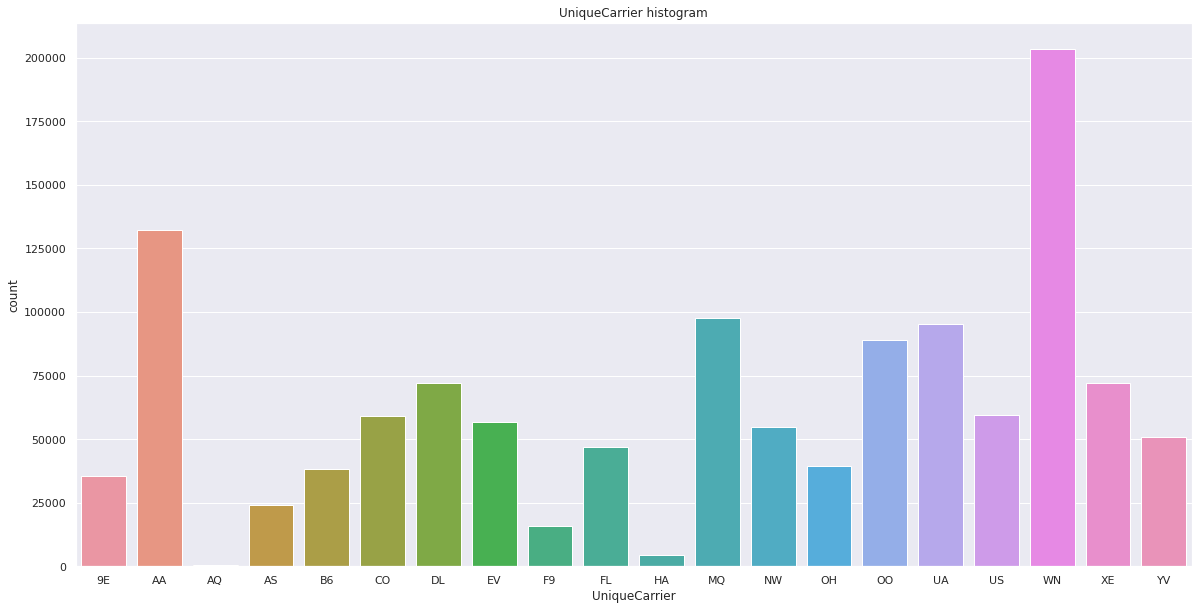

In [ ]:
ax1 = sns.countplot(data=df, x="UniqueCarrier")
plt.title("UniqueCarrier histogram")

#### Catplot

Figure-level interface for drawing categorical plots onto a FacetGrid.

Text(0.5, 1.0, 'UniqueCarrier histogram')

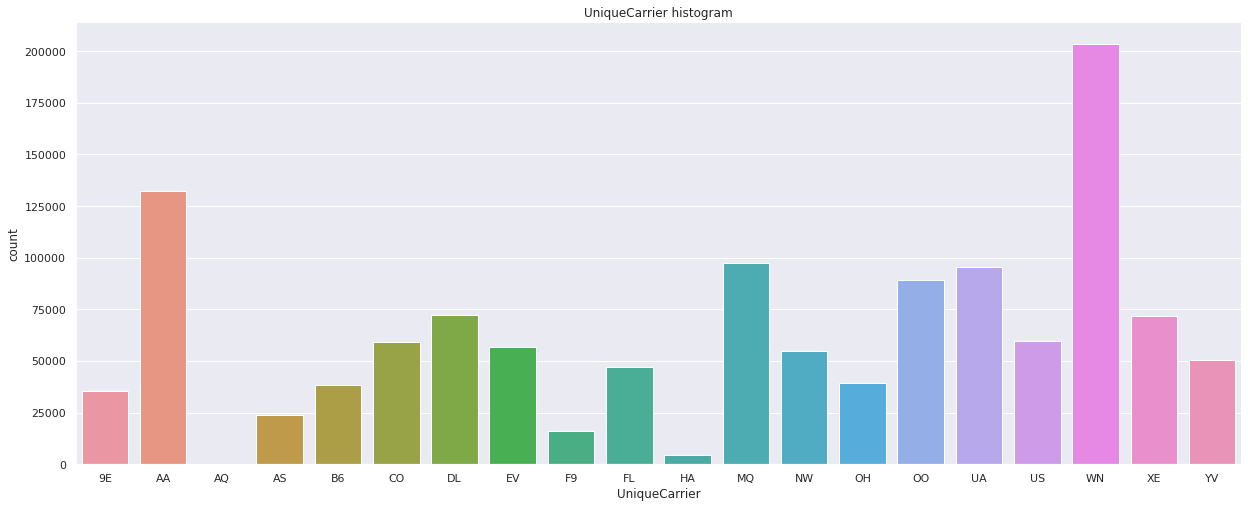

In [ ]:
ax1_3 = sns.catplot(data=df, x="UniqueCarrier", kind="count", height=7, aspect=2.5)
plt.title("UniqueCarrier histogram")

#### histplot

Plot univariate or bivariate histograms to show distributions of datasets.


Text(0.5, 1.0, 'UniqueCarrier histogram')

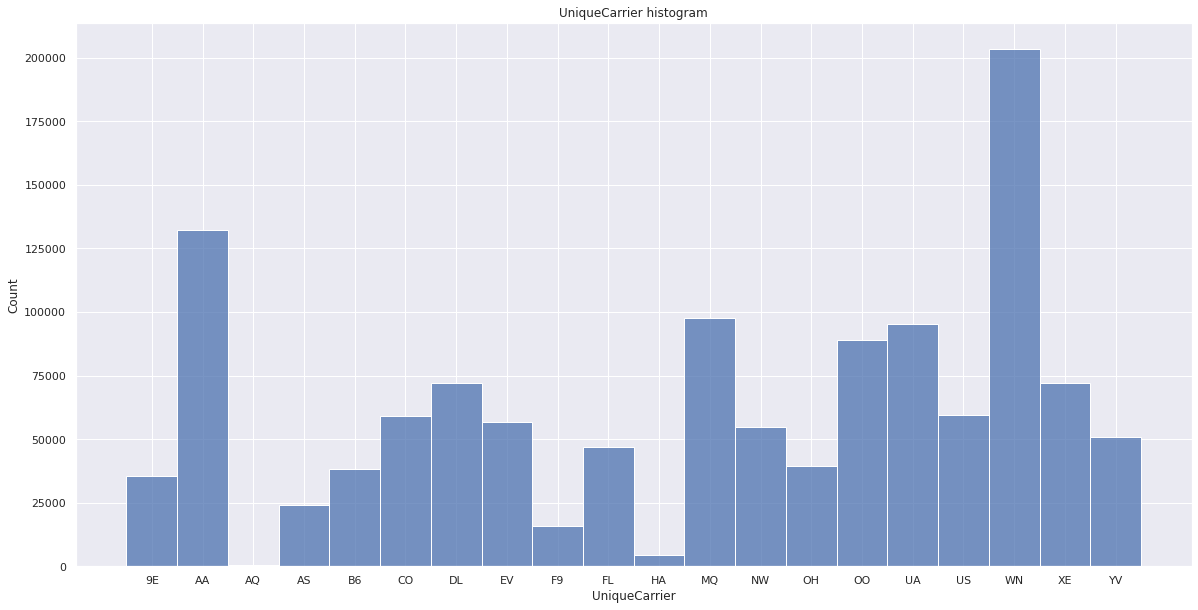

In [ ]:
ax1_1 = sns.histplot(data=df, x="UniqueCarrier")
plt.title("UniqueCarrier histogram")

Text(0.5, 1.0, 'UniqueCarrier histogram')

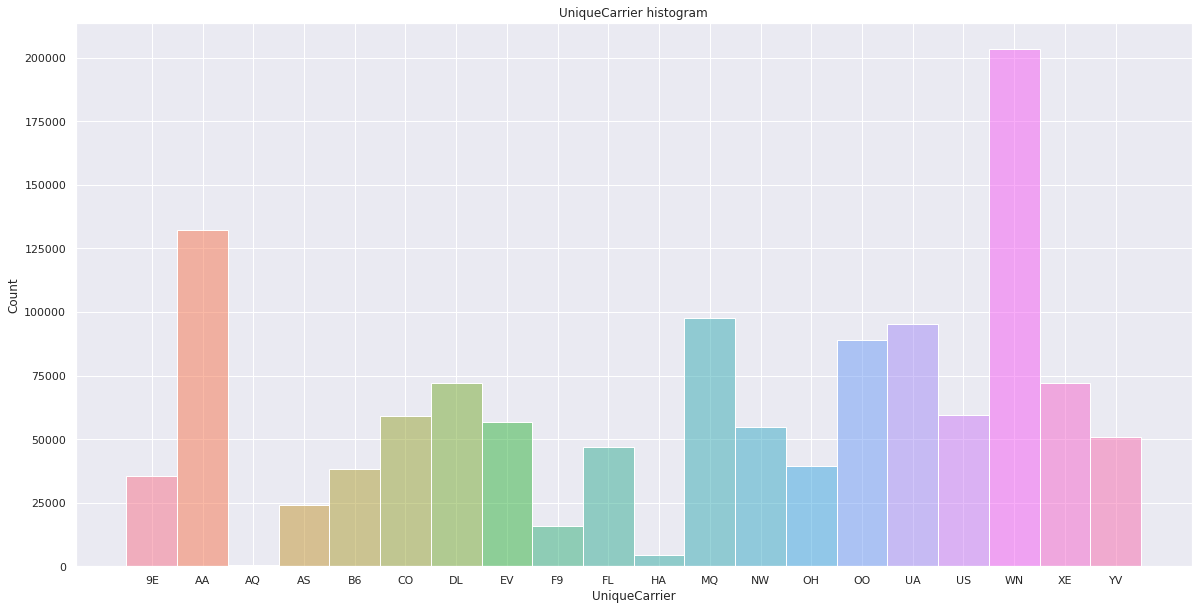

In [ ]:
ax1_2 = sns.histplot(data=df, x="UniqueCarrier", hue="UniqueCarrier", legend=False)
plt.title("UniqueCarrier histogram")

#### Multiple countplot

In [ ]:
df[['Month','DayofMonth','DayOfWeek','UniqueCarrier']].head(2)

Month DayofMonth DayOfWeek UniqueCarrier
4     1          3         4            WN
6     1          3         4            WN

In [ ]:
for i, attribute in enumerate(['Month','DayofMonth','DayOfWeek','UniqueCarrier']):
    print(i, attribute)

0 Month
1 DayofMonth
2 DayOfWeek
3 UniqueCarrier


In [ ]:
 plt.subplots(4,1, figsize=(20,15))

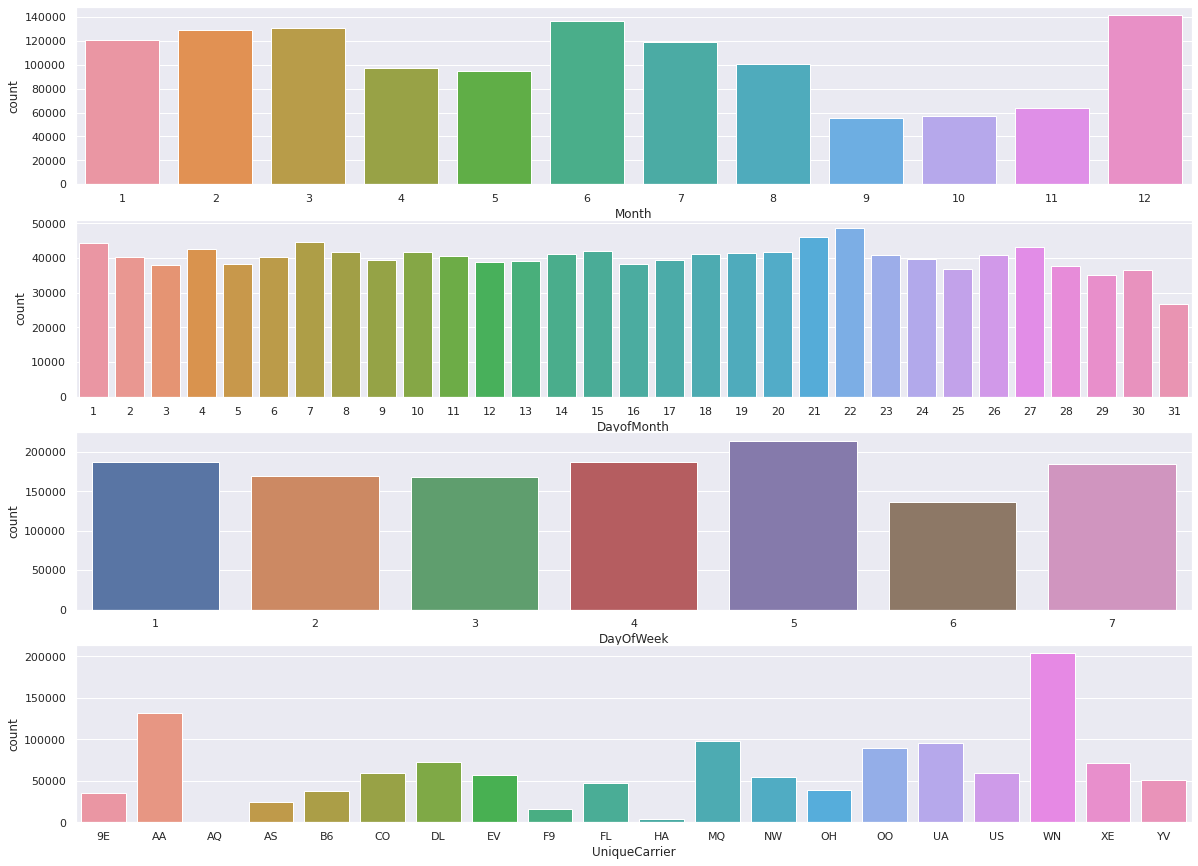

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(20,15))
for i, attribute in enumerate(['Month','DayofMonth','DayOfWeek','UniqueCarrier']):
    sns.countplot(data=df, x=attribute, ax=axs[i])
plt.show()

### A numerical variable

In [ ]:
df.select_dtypes(include=['int32']).head(2)

ActualElapsedTime  CRSElapsedTime  ...  SecurityDelay  LateAircraftDelay
4                 90              90  ...              0                 32
6                240             250  ...              0                 47

[2 rows x 13 columns]

#### Distribution plot

Text(0.5, 1.0, 'ArrDelay distribution')

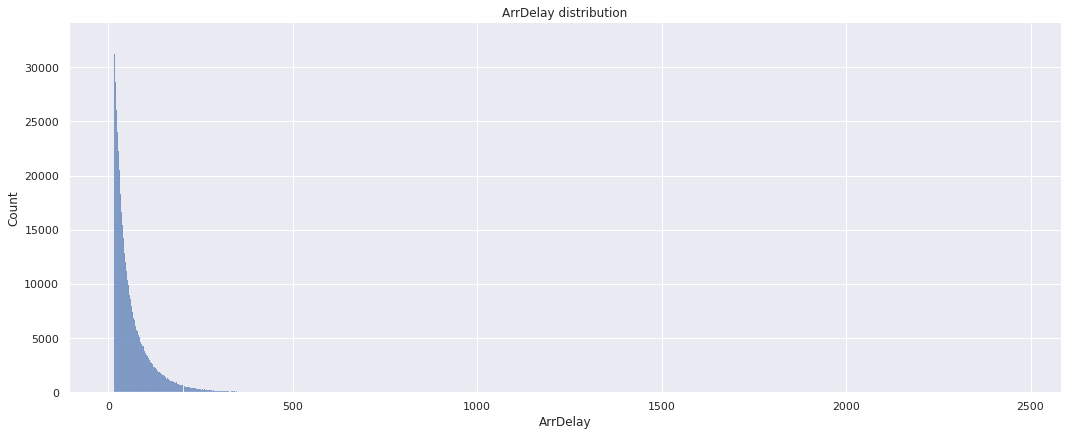

In [ ]:
ax2 = sns.displot(data=df, x="ArrDelay", height=6, aspect=2.5)
plt.title("ArrDelay distribution")

#### Histogram plot

Text(0.5, 1.0, 'ArrDelay distribution')

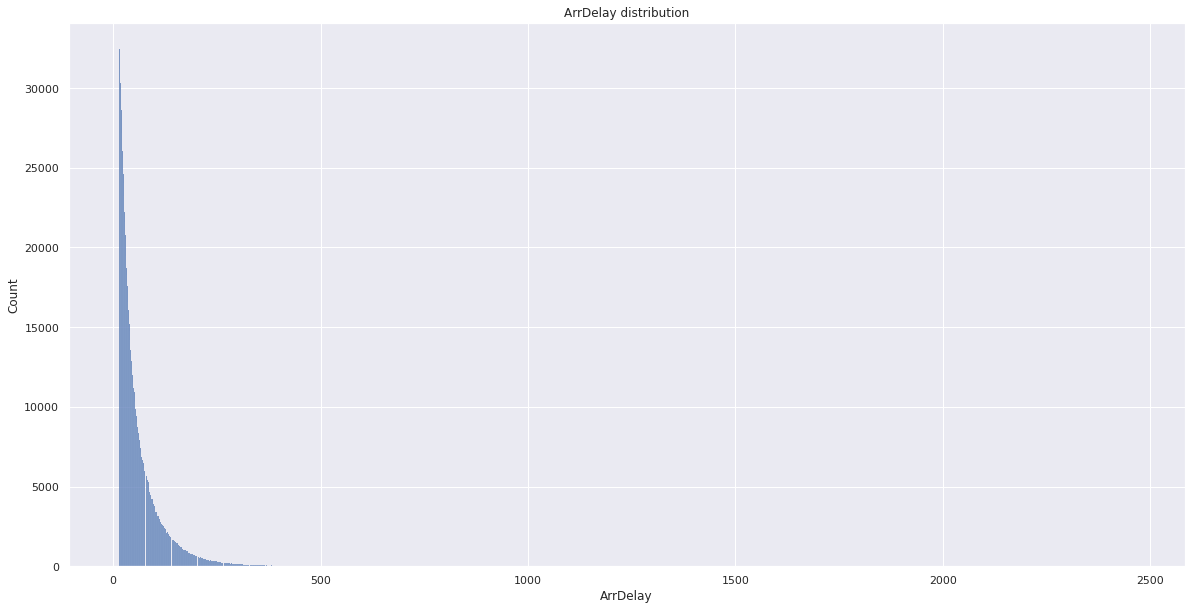

In [ ]:
ax2 = sns.histplot(data=df, x="ArrDelay")
plt.title("ArrDelay distribution")

#### Multiple histograms

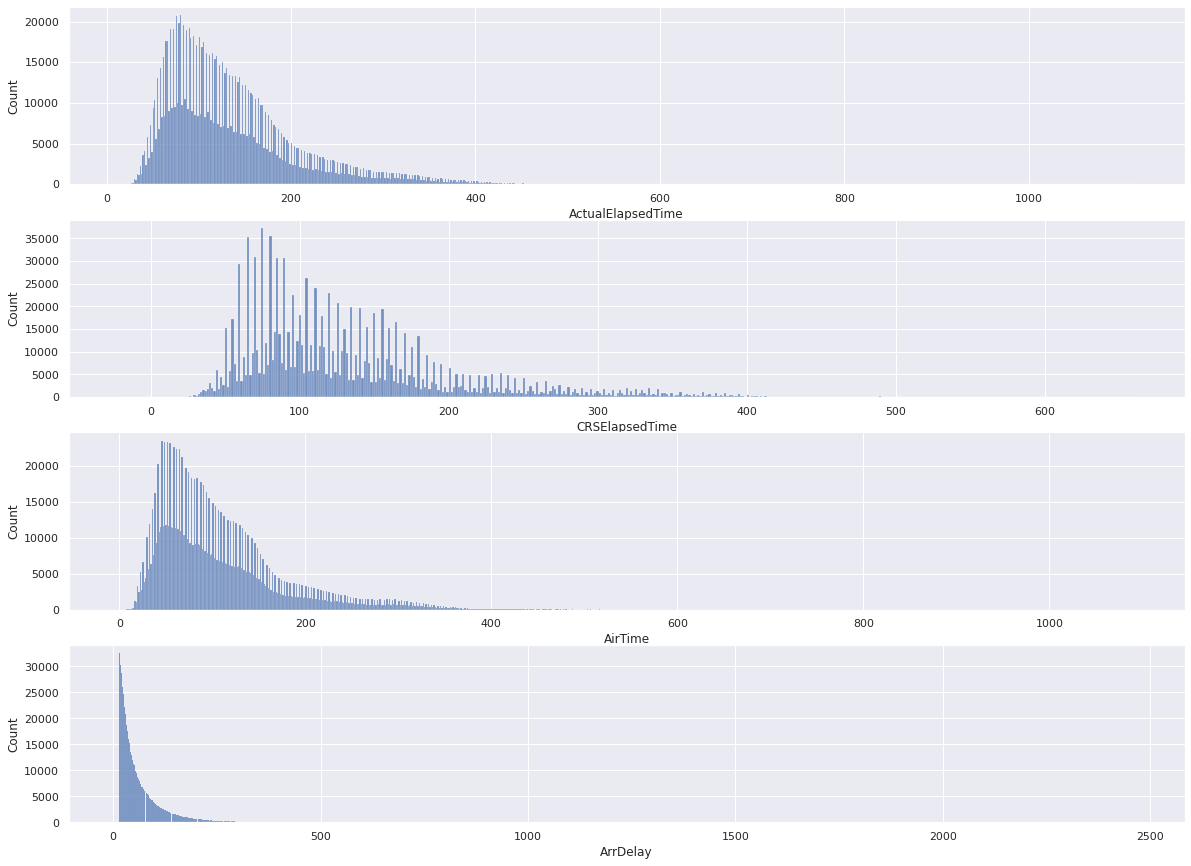

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(20,15))

for i, attribute in enumerate(['ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay']):
    sns.histplot(data=df, x=attribute, ax=axs[i])
plt.show()

### A numeric and a categorical variable

#### Boxplot

Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [ ]:
df[['Distance']].describe()

Distance
count  1.247486e+06
mean   7.415867e+02
std    5.593643e+02
min    1.100000e+01
25%    3.340000e+02
50%    5.950000e+02
75%    9.720000e+02
max    4.962000e+03

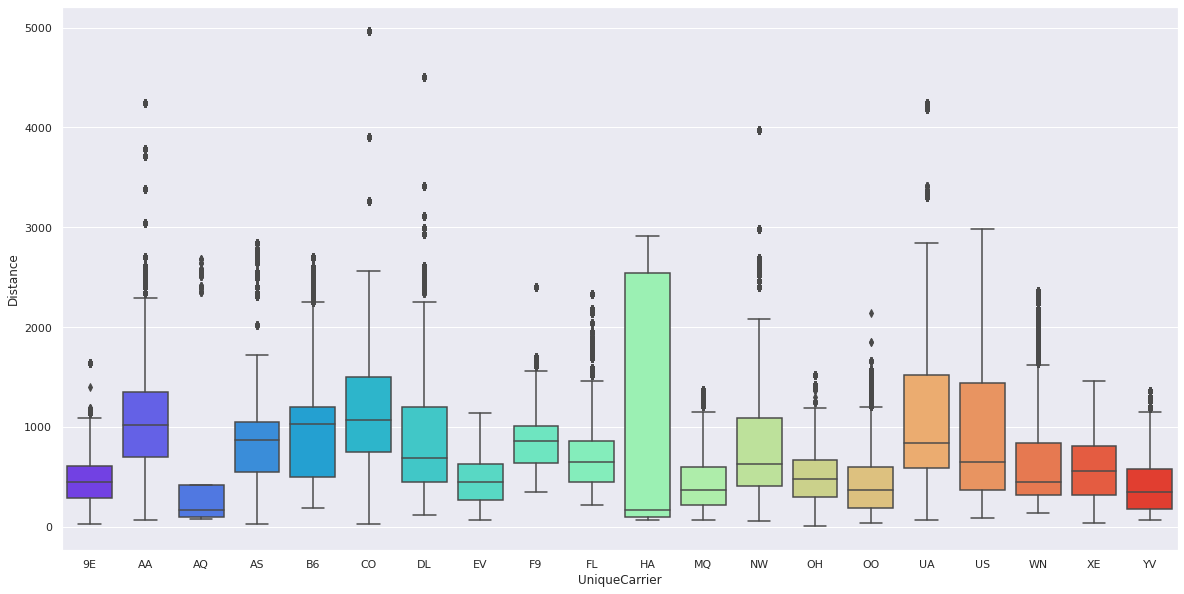

In [ ]:
ax3 = sns.boxplot(x='UniqueCarrier',y='Distance',data=df, palette='rainbow')

### Two numerical variables (ArrDelay i DepDelay).

##### Scatterplot

Text(0.5, 1.0, 'ArrDelay by DepDelay scatterplot')

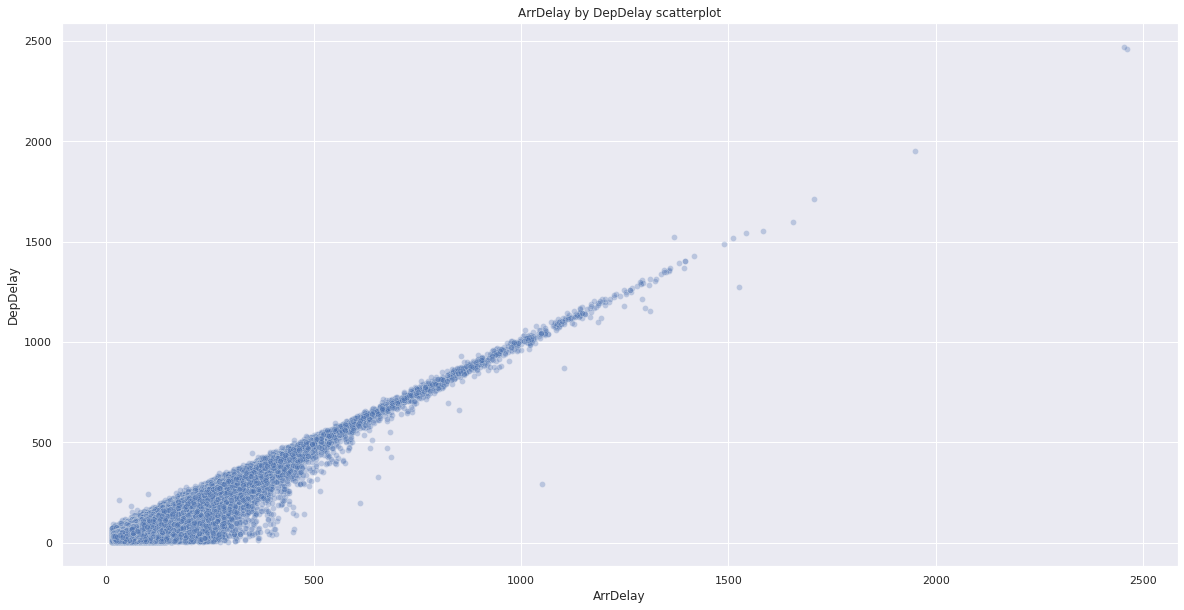

In [ ]:
ax4 = sns.scatterplot(x="ArrDelay",y="DepDelay",data=df,alpha=.3)
plt.title("ArrDelay by DepDelay scatterplot")

##### Relplot

Text(0.5, 1.0, 'ArrDelay by DepDelay scatterplot')

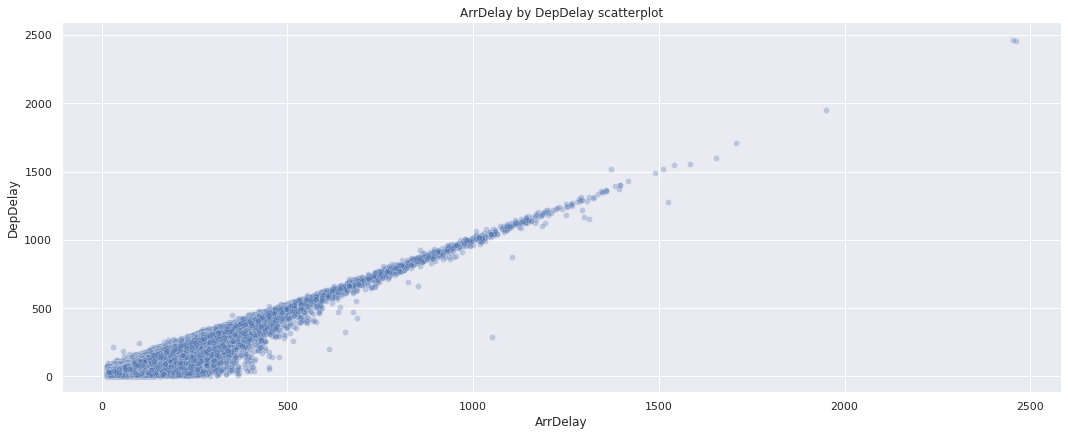

In [ ]:
ax4 = sns.relplot(x="ArrDelay", y="DepDelay",alpha=.3, height=6, aspect=2.5, data=df, kind='scatter');
plt.title("ArrDelay by DepDelay scatterplot")

### Tree variables (ArrDelay, DepDelay i UniqueCarrier) 

##### Hued Scatterplot

Text(0.5, 1.0, 'ArrDelay by DepDelay scatterplot')

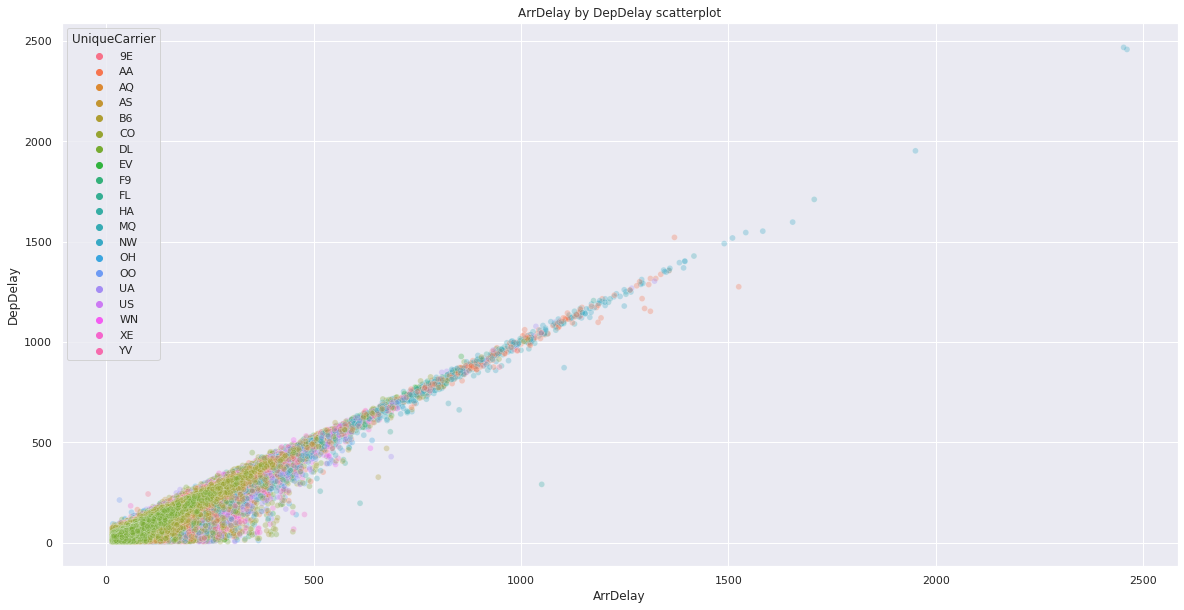

In [ ]:
ax4 = sns.scatterplot(x="ArrDelay", y="DepDelay", data=df, hue = "UniqueCarrier", alpha=.3)
plt.title("ArrDelay by DepDelay scatterplot")

##### FacetGrid Scatterplot

In [ ]:
ax5 = sns.FacetGrid(df, col = "UniqueCarrier", hue = "UniqueCarrier", col_wrap=4)
ax5.map(sns.scatterplot, "ArrDelay", "DepDelay",alpha=.3)

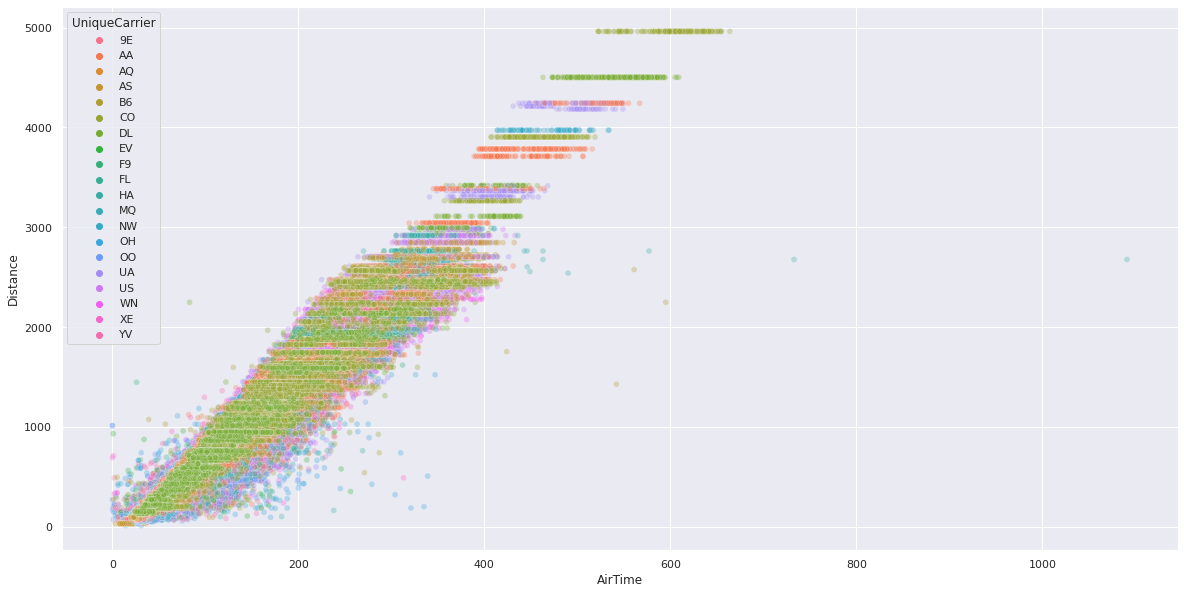

In [ ]:
sns.scatterplot(x="AirTime", y="Distance", data=df, hue="UniqueCarrier",alpha=.3);

### More than three variables (ArrDelay, DepDelay, AirTime i UniqueCarrier). 3D Scatter + color identification

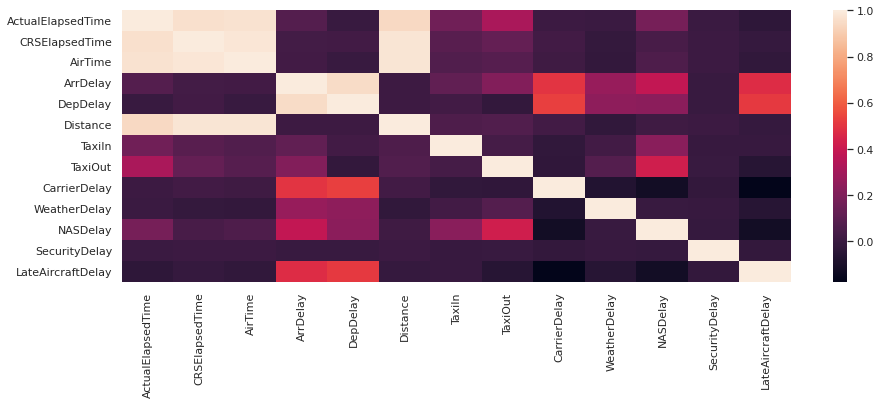

In [ ]:
sns.heatmap(df.select_dtypes(include=['int32']).corr());

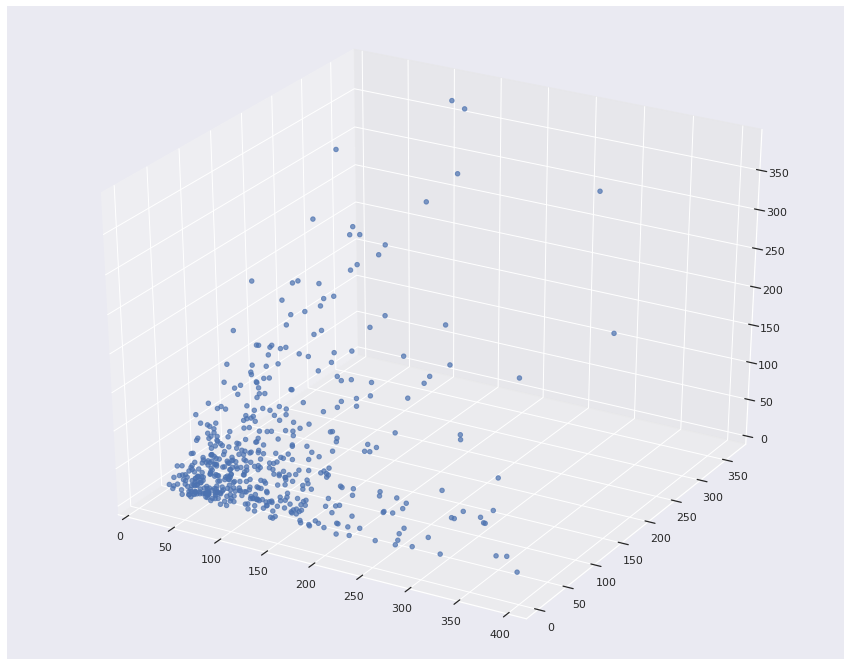

In [ ]:
df_s =df.sample(n=500, random_state=1)
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_s.AirTime, 
           df_s.DepDelay,
           df_s.ArrDelay,
           alpha=.7)

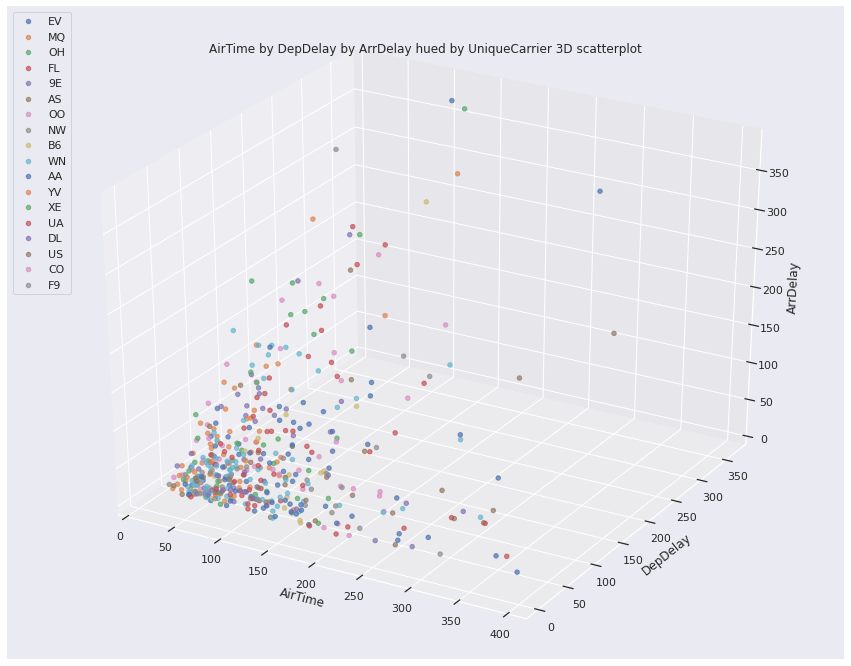

In [ ]:
df_s =df.sample(n=500, random_state=1)
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
for s in df_s.UniqueCarrier.unique():
    ax.scatter(df_s.AirTime[df_s.UniqueCarrier==s],
                df_s.DepDelay[df_s.UniqueCarrier==s],
                df_s.ArrDelay[df_s.UniqueCarrier==s],
                label=s,
                alpha=.7)
ax.set(xlabel='AirTime',
        ylabel='DepDelay',
        zlabel='ArrDelay',
        title="AirTime by DepDelay by ArrDelay hued by UniqueCarrier 3D scatterplot")
plt.legend(loc='upper left')

In [ ]:
def animate(frame):
  ax.view_init(elev=0, azim=frame)
  plt.pause(.001)
  return fig
  
anim = animation.FuncAnimation(fig, animate, frames=60, interval=50)
HTML(anim.to_html5_video())

In [ ]:
def animate(frame):
  ax.view_init(elev=30, azim=frame)
  plt.pause(.001)
  return fig
  
anim = animation.FuncAnimation(fig, animate, frames=360, interval=50)
HTML(anim.to_html5_video())

In [ ]:
anim.save('dynamic_images.mp4')


## Exercici 2
Exporta els gràfics com imatges o com html.

In [ ]:
ax1.get_figure().savefig('01-UniqueCarrier.png')
ax2.savefig('02-ArrDelay.png')
ax3.get_figure().savefig('03-ArrDelayVsUniqueCarrier.png')
ax4.savefig('04-ArrDelayVsDepDelay.png')
ax5.savefig('05-ArrDelayVsDepDelayVsUniqueCarrier.png')
ax6.get_figure().savefig('06-ArrDelayVsDepDelayVsAirTimeVsUniqueCarrier.png')

## Exercici 3
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

Variables that will be used:
- **Year, Month, DayofMonth**: dates of the flight
- **CRSDepTime** and **CRSArrTime** : scheduled times of take-off and landing
- **DepTime** and **ArrTime**: real times at which take-off and landing took place
- **DepDelay** and **ArrDelay**: difference (in minutes) between planned and real times
- **Distance**: distance (in miles)
- **AirTime**: time (in minutes) in air. 

In [ ]:
df = pd.read_csv("./DelayedFlights.csv", index_col=0)

#I only select the columns that I consider relevant.
df = df[["Year","Month","DayofMonth","DayOfWeek","UniqueCarrier","DepTime","CRSDepTime","ArrTime","CRSArrTime","AirTime","ArrDelay","DepDelay","Distance","Origin","Dest"]]

#Drop nulls an inf
#df = df.replace([np.inf, -np.inf], np.nan)
df.head()

Year  Month  DayofMonth  DayOfWeek  ... DepDelay  Distance  Origin  Dest
0  2008      1           3          4  ...      8.0       810     IAD   TPA
1  2008      1           3          4  ...     19.0       810     IAD   TPA
2  2008      1           3          4  ...      8.0       515     IND   BWI
4  2008      1           3          4  ...     34.0       515     IND   BWI
5  2008      1           3          4  ...     25.0       688     IND   JAX

[5 rows x 15 columns]

Fes un informe complet del data set:.

* Resumeix estadísticament les columnes d’interès
* Troba quantes dades faltants hi ha per columna
* Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
* Taula de les aerolínies amb més endarreriments acumulats
* Quins són els vols més llargs? I els més endarrerits?
Etc.


### Descriptive statistics.

In [ ]:
#Summarize descriptive statistics.
df.describe()

Year         Month  ...      DepDelay      Distance
count  1928371.0  1.928371e+06  ...  1.928371e+06  1.928371e+06
mean      2008.0  6.107855e+00  ...  4.309169e+01  7.649486e+02
std          0.0  3.480753e+00  ...  5.326600e+01  5.738858e+02
min       2008.0  1.000000e+00  ...  6.000000e+00  1.100000e+01
25%       2008.0  3.000000e+00  ...  1.200000e+01  3.380000e+02
50%       2008.0  6.000000e+00  ...  2.400000e+01  6.060000e+02
75%       2008.0  9.000000e+00  ...  5.300000e+01  9.970000e+02
max       2008.0  1.200000e+01  ...  2.467000e+03  4.962000e+03

[8 rows x 11 columns]

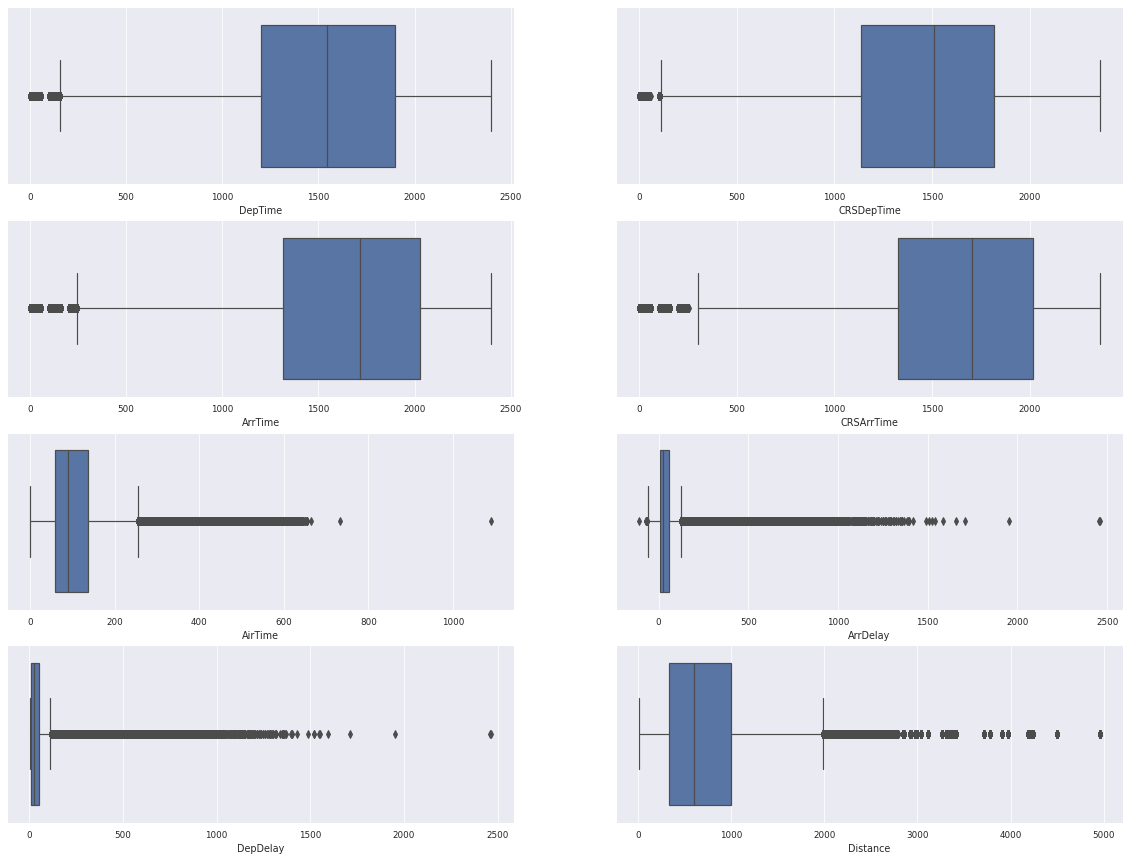

In [ ]:
fig, axes = plt.subplots(4, 2,figsize=(20,15))
axes = axes.flatten()
ax = sns.boxplot(x="DepTime", data=df, orient='v', ax=axes[0])
ax = sns.boxplot(x="CRSDepTime", data=df, orient='v', ax=axes[1])
ax = sns.boxplot(x="ArrTime", data=df, orient='v', ax=axes[2])
ax = sns.boxplot(x="CRSArrTime", data=df, orient='v', ax=axes[3])
ax = sns.boxplot(x="AirTime", data=df, orient='v', ax=axes[4])
ax = sns.boxplot(x="ArrDelay", data=df, orient='v', ax=axes[5])
ax = sns.boxplot(x="DepDelay", data=df, orient='v', ax=axes[6])
ax = sns.boxplot(x="Distance", data=df, orient='v', ax=axes[7])

In [ ]:
df.isnull().any()

Year          False
Month         False
DayofMonth    False
DepTime       False
CRSDepTime    False
ArrTime       False
CRSArrTime    False
AirTime       False
ArrDelay      False
DepDelay      False
Distance      False
Origin        False
Dest          False
AvgSpeed      False
dtype: bool

In [ ]:
df.isnull().sum()

Year             0
Month            0
DayofMonth       0
DepTime          0
CRSDepTime       0
ArrTime       7110
CRSArrTime       0
AirTime       8387
ArrDelay      8387
DepDelay         0
Distance         0
Origin           0
Dest             0
dtype: int64

In [ ]:
df.isna().sum()

Year             0
Month            0
DayofMonth       0
DepTime          0
CRSDepTime       0
ArrTime       7110
CRSArrTime       0
AirTime       8387
ArrDelay      8387
DepDelay         0
Distance         0
Origin           0
Dest             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Year          0
Month         0
DayofMonth    0
DepTime       0
CRSDepTime    0
ArrTime       0
CRSArrTime    0
AirTime       0
ArrDelay      0
DepDelay      0
Distance      0
Origin        0
Dest          0
dtype: int64

### Create new columns

#### Date

#### Date of the flight

In [ ]:
df["Date"] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.DayofMonth))
df.head()

Year  Month  DayofMonth  DayOfWeek  ... Distance  Origin  Dest       Date
0  2008      1           3          4  ...      810     IAD   TPA 2008-01-03
1  2008      1           3          4  ...      810     IAD   TPA 2008-01-03
2  2008      1           3          4  ...      515     IND   BWI 2008-01-03
4  2008      1           3          4  ...      515     IND   BWI 2008-01-03
5  2008      1           3          4  ...      688     IND   JAX 2008-01-03

[5 rows x 16 columns]

#### Average flight speed

In [ ]:
#Create new columns (average flight speed, whether you arrived late or not ...).

##Average flight speed
df['AvgSpeed'] = round(60*df['Distance']/df['AirTime'])
df.head()

Year  Month  DayofMonth  DayOfWeek  ... Origin  Dest       Date  AvgSpeed
0  2008      1           3          4  ...    IAD   TPA 2008-01-03     419.0
1  2008      1           3          4  ...    IAD   TPA 2008-01-03     430.0
2  2008      1           3          4  ...    IND   BWI 2008-01-03     407.0
4  2008      1           3          4  ...    IND   BWI 2008-01-03     401.0
5  2008      1           3          4  ...    IND   JAX 2008-01-03     474.0

[5 rows x 17 columns]

In [ ]:
np.isinf(df.AvgSpeed).any()

True

In [ ]:
df[(np.isinf(df.AvgSpeed))]

Year  Month  DayofMonth  DayOfWeek  ...  Origin  Dest       Date  AvgSpeed
175935   2008      1           5          6  ...     SGU   SLC 2008-01-05       inf
177448   2008      1           6          7  ...     TWF   SLC 2008-01-06       inf
782963   2008      2          12          2  ...     ASE   ORD 2008-02-12       inf
1277190  2008      3          31          1  ...     MSY   MCI 2008-03-31       inf
1374982  2008      3          18          2  ...     ASE   ORD 2008-03-18       inf
2588940  2008      5          21          3  ...     LAX   SAN 2008-05-21       inf
2597845  2008      5          27          2  ...     SAN   LAX 2008-05-27       inf

[7 rows x 16 columns]

In [ ]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df.dropna(inplace=True)
np.isinf(df.AvgSpeed).any()

False

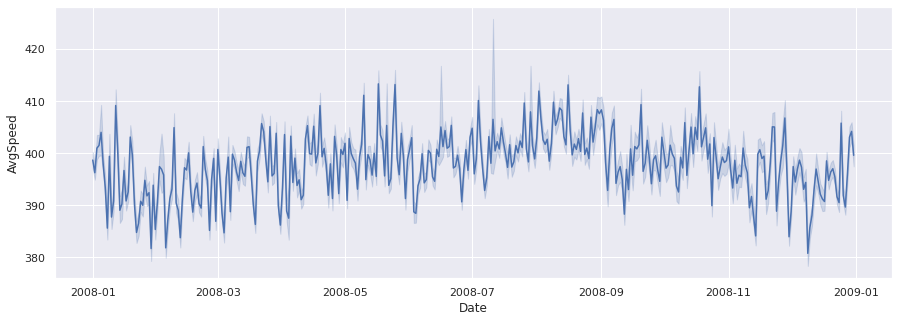

In [ ]:
sns.lineplot(data=df, x="Date", y="AvgSpeed")
plt.title("Time serie of average speed")

In [ ]:
df.groupby(by="Month")["AvgSpeed"].mean()

Month
1     393.734579
2     392.257714
3     395.613180
4     396.765698
5     398.829899
6     397.857615
7     400.477568
8     404.030252
9     398.151912
10    399.247546
11    394.471212
12    394.078379
Name: AvgSpeed, dtype: float64

Text(0.5, 1.0, 'AvgSpeed by Month')

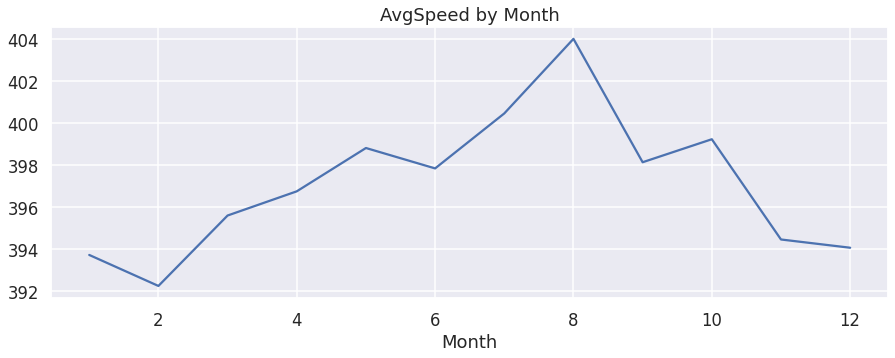

In [ ]:
df.groupby(by="Month")["AvgSpeed"].mean().plot()
plt.title("AvgSpeed by Month")

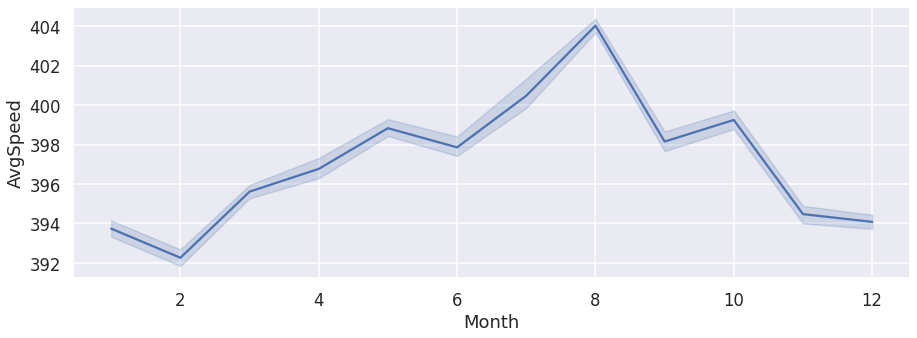

In [ ]:
sns.lineplot(data=df, x="Month", y="AvgSpeed")

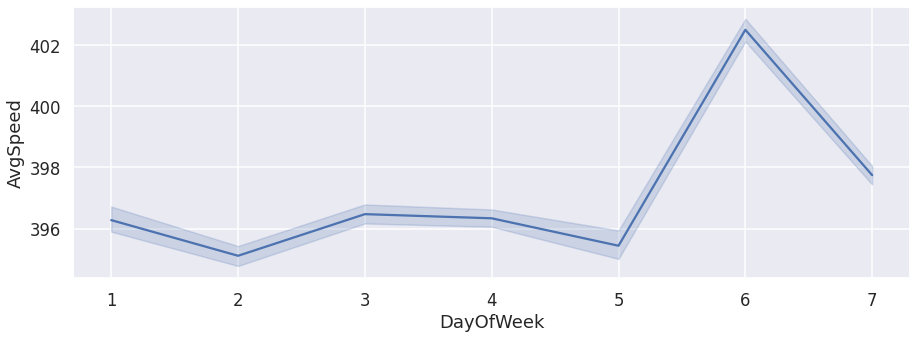

In [ ]:
sns.lineplot(data=df, x="DayOfWeek", y="AvgSpeed")

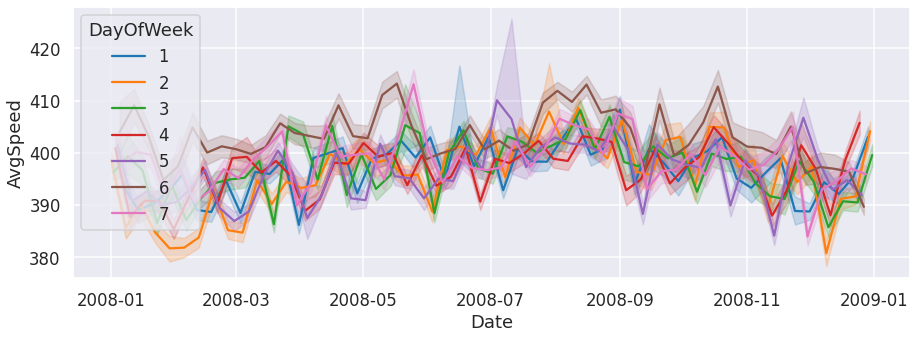

In [ ]:
sns.lineplot(data=df, x="Date", y="AvgSpeed", hue="DayOfWeek", palette="tab10")

#### Arrived late (T/F)

In [ ]:
#Whether the flight arrived late or not
df['ArrLate'] = df['ArrDelay']>0
df.head(3)

Year  Month  DayofMonth  DayOfWeek  ... Dest       Date  AvgSpeed  ArrLate
0  2008      1           3          4  ...  TPA 2008-01-03     419.0    False
1  2008      1           3          4  ...  TPA 2008-01-03     430.0     True
2  2008      1           3          4  ...  BWI 2008-01-03     407.0     True

[3 rows x 18 columns]

In [ ]:
df["ArrLate"].value_counts()

True     1723409
False     204955
Name: ArrLate, dtype: int64

Text(0.5, 1.0, 'ArrLate piechart')

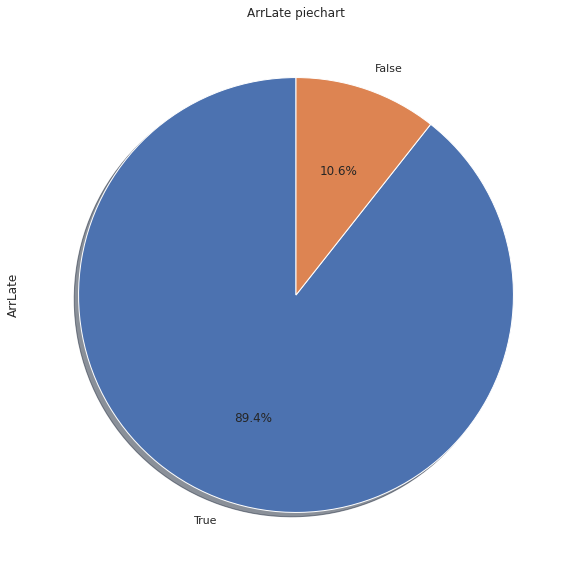

In [ ]:
df["ArrLate"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("ArrLate piechart")

#### Taula de les aerolínies amb més endarreriments acumulats


In [ ]:
#Delay percentage for each destination airport
UniqueCarrier_ArrLate_Mean_df=round(pd.DataFrame(df.groupby(['UniqueCarrier'])['ArrLate'].mean()),3)*100
#Rename column
UniqueCarrier_ArrLate_Mean_df = UniqueCarrier_ArrLate_Mean_df.rename(columns={'ArrLate': 'ArrLatePCT'})
#Descending sort 
UniqueCarrier_ArrLate_Mean_df.sort_values('ArrLatePCT', ascending=False, inplace=True)
#top 10
UniqueCarrier_ArrLate_Mean_df.head(10)

ArrLatePCT
UniqueCarrier            
HA                   96.3
YV                   94.8
OH                   93.6
MQ                   92.5
OO                   92.5
EV                   91.9
NW                   91.8
FL                   91.6
XE                   91.4
F9                   91.1

Text(0.5, 1.0, 'Delay percentage for each airline')

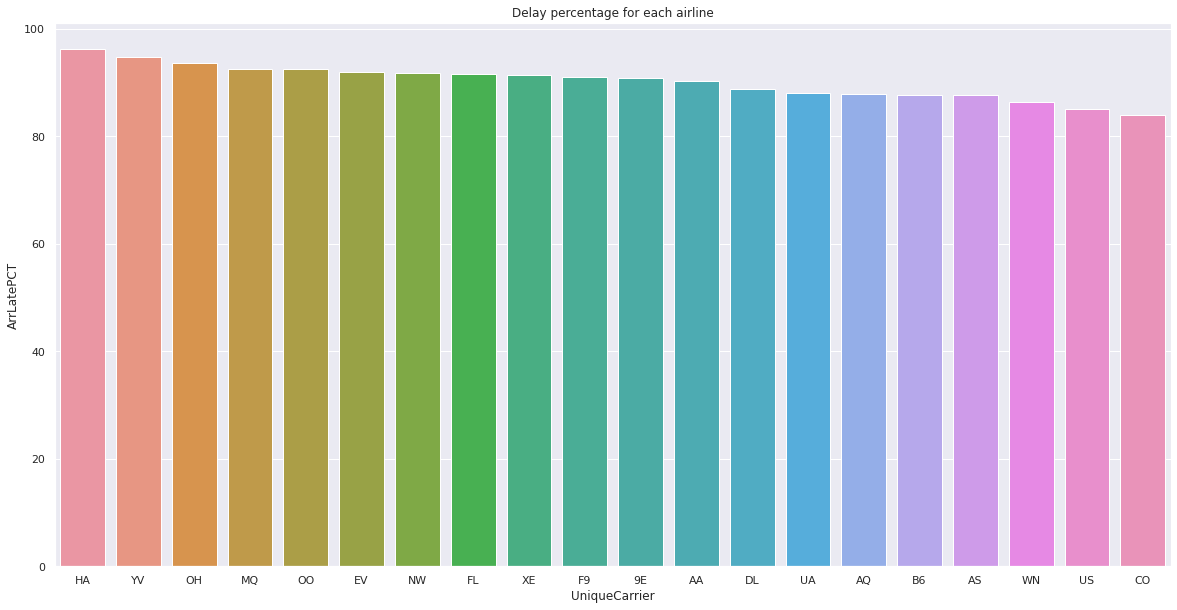

In [ ]:
sns.barplot(x = UniqueCarrier_ArrLate_Mean_df.index, y = "ArrLatePCT", data =UniqueCarrier_ArrLate_Mean_df)
plt.title("Delay percentage for each airline")

#### Longest flights

In [ ]:
##What are the longest flights?
#Join Distance-Origin-Destination. In case there are routes with different 
#distances for the same origin-destination combinations 
Dist_Ori_Dest = df.Distance.astype(str)+"-"+df.Origin+"-"+df.Dest
#unique values
Dist_Ori_Dest = Dist_Ori_Dest.unique()
Dist_Ori_Dest_df = pd.DataFrame(Dist_Ori_Dest)
#disjoin
Dist_Ori_Dest_df = Dist_Ori_Dest_df[0].str.split("-",expand=True)
Dist_Ori_Dest_df.columns = ["Dist","Ori","Dest"]
Dist_Ori_Dest_df = pd.DataFrame(np.sort(Dist_Ori_Dest_df.values, axis=1), columns=Dist_Ori_Dest_df.columns).drop_duplicates()
# convert distance from string to number
Dist_Ori_Dest_df["Dist"] = Dist_Ori_Dest_df["Dist"].astype(int)

Dist_Ori_Dest_df = Dist_Ori_Dest_df.sort_values(by="Dist", ascending=False).reset_index(drop=True)
#Sort by distance and top 10
Dist_Ori_Dest_df.head(10)

Dist  Ori Dest
0  4962  EWR  HNL
1  4502  ATL  HNL
2  4243  HNL  ORD
3  4213  KOA  ORD
4  4184  OGG  ORD
5  3972  HNL  MSP
6  3904  HNL  IAH
7  3784  DFW  HNL
8  3711  DFW  OGG
9  3417  ANC  ATL

Text(0.5, 1.0, 'Longest flights. Top 10')

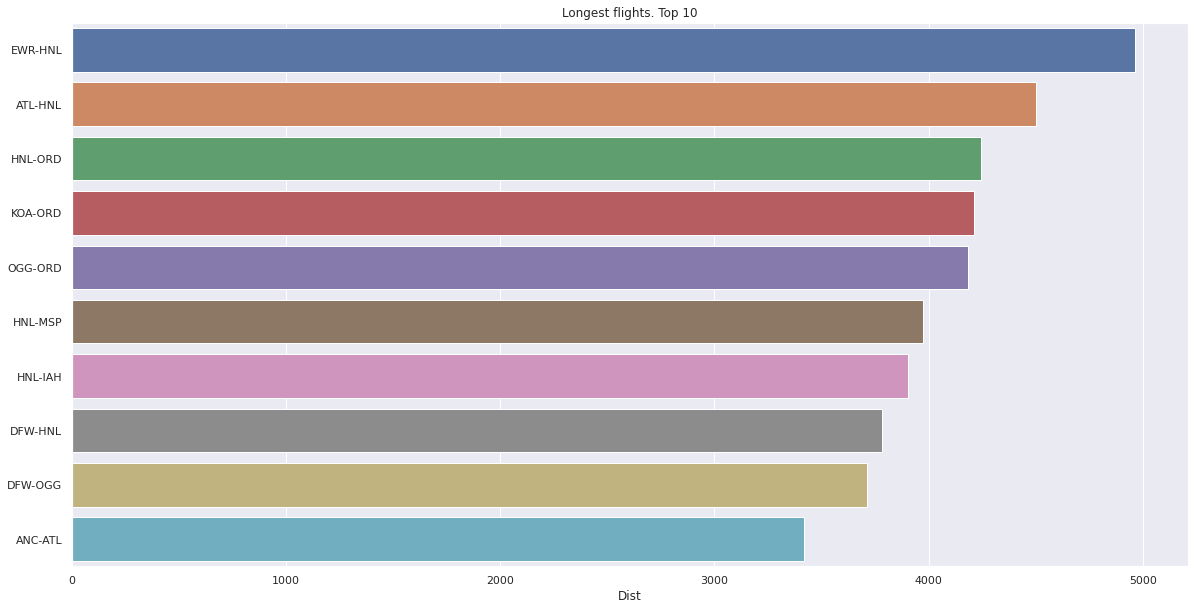

In [ ]:
sns.barplot(y = Dist_Ori_Dest_df.head(10)["Ori"]+"-"+Dist_Ori_Dest_df.head(10)["Dest"], 
            x= Dist_Ori_Dest_df.head(10)["Dist"])
plt.title("Longest flights. Top 10")

Text(0.5, 1.0, 'Longest flights. Top 10')

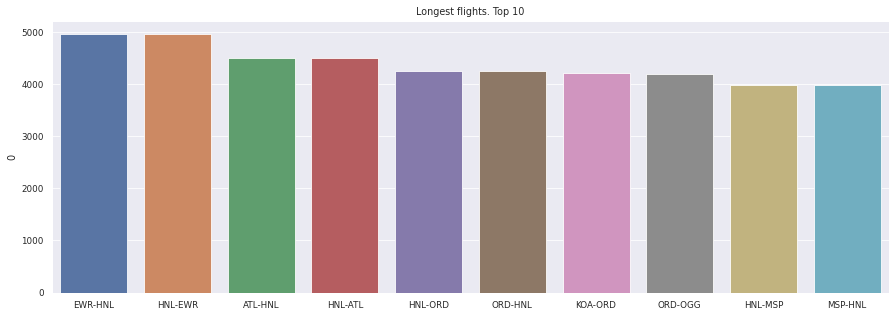

In [ ]:
sns.barplot(Dist_Ori_Dest_df[1]+"-"+Dist_Ori_Dest_df[2], Dist_Ori_Dest_df[0])
plt.title("Longest flights. Top 10")

In [ ]:
#Flights with more delays

#Join rigin-Destination.
df["OriDest"] = df.Origin+"-"+df.Dest
#Delay percentage
flights_delays = round(df.groupby(['OriDest'])['ArrLate'].mean(),4)*100
#Sort and top 10
flights_delays = flights_delays.sort_values(ascending=False).head(10)
flights_delays

OriDest
BOS-ACK    100.0
CVG-TOL    100.0
SRQ-STL    100.0
SRQ-TPA    100.0
BOS-BNA    100.0
IND-SEA    100.0
STL-AUS    100.0
CHO-DCA    100.0
LNK-PIA    100.0
HRL-IAH    100.0
Name: ArrLate, dtype: float64

Text(0.5, 1.0, 'Flights with more delays. Top 10')

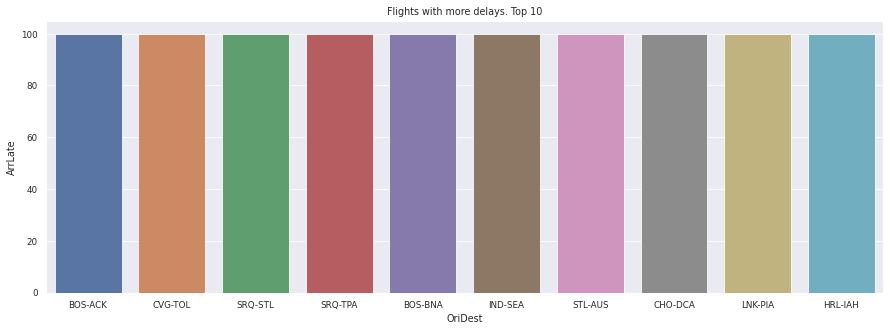

In [ ]:
sns.barplot(flights_delays.index, flights_delays)
plt.title("Flights with more delays. Top 10")